<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Insurance Cost Analysis**


**Parameters:**

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:
* `skillsnetwork` to download the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [1]:
import piplite
await piplite.install('seaborn')

### Importing Required Libraries

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import  PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

### Download the dataset 


In [72]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [73]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [74]:
await download(filepath, "insurance.csv")
file_name="insurance.csv"

In [75]:
df = pd.read_csv(file_name)

### 1. Import the dataset into a `pandas` dataframe. 

In [76]:
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


### Adding headers to the dataframe:

In [77]:
headers = ['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region', 'charges']
df.columns = headers

#### Replacing '?' with NaN


In [78]:
df.replace('?', np.nan, inplace=True)

# Task 2 : Data Wrangling


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 130.0+ KB


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [80]:
print(df['age'].isnull().sum())
print(df['smoker'].isnull().sum())

4
7


#### Handling missing **AGE** values 


In [81]:
age_values = df['age'].astype(float).mean(axis=0)
print(age_values)
df['age'].replace(np.nan, age_values, inplace=True)
print(df['age'].isnull().sum())

39.11709432598482


<ipython-input-81-0eaf98c20997>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(np.nan, age_values, inplace=True)


0


#### Handling missing **SMOKER** values 


In [82]:
smoker_values = df['smoker'].value_counts().idxmax()
print(smoker_values)
df['smoker'].replace(np.nan, smoker_values, inplace=True)

0


<ipython-input-82-72e355126565>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace(np.nan, smoker_values, inplace=True)


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 130.0+ KB


In [84]:
print(df['charges'][0:5])

0     1725.55230
1     4449.46200
2    21984.47061
3     3866.85520
4     3756.62160
Name: charges, dtype: float64


In [85]:
df[["charges"]] = np.round(df[["charges"]],2)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 130.0+ KB


In [88]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


#  Exploratory Data Analysis (EDA)

Regression plot for `charges` with respect to `bmi`. 


(0.0, 66902.85800000001)

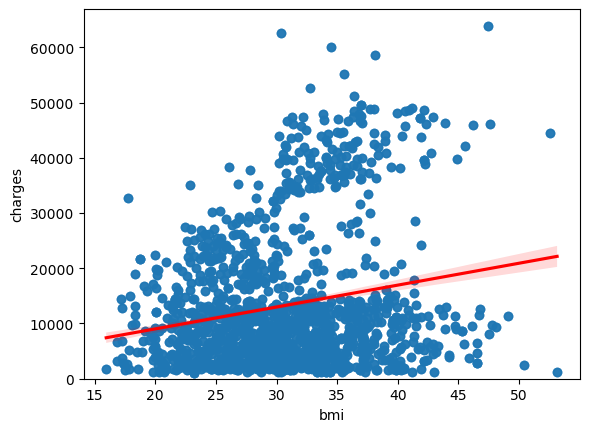

In [185]:
sns.regplot(x = 'bmi', y = 'charges', data = df, line_kws={'color':'red'})
plt.ylim(0,)

Box plot for `charges` with respect to `smoker`.


<AxesSubplot:xlabel='smoker', ylabel='charges'>

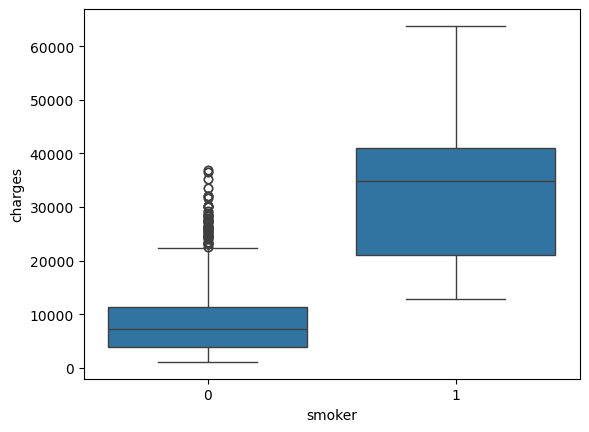

In [186]:
sns.boxplot(x='smoker', y = 'charges', data = df)

##### Correlation matrix for the dataset.


In [187]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026578,0.112855,0.037137,-0.022289,-0.006977,0.298890
gender,-0.026578,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112855,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037137,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022289,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006977,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298890,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


#  Model Development

Fiting a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset.


In [190]:
lre = LinearRegression()
X = df[['smoker']]
Y = df['charges']
lre.fit(X,Y)

LinearRegression()

#### $ R^2 $ score of the SLR model.

In [191]:
r2_single = lre.score(X,Y)
print(r2_single)

0.6227430402464125


Fiting a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. 


In [193]:
mlr = LinearRegression()
Z = df[['smoker', 'bmi', 'gender', 'age', 'no_of_children', 'region', ]]
mlr.fit(Z,Y)

LinearRegression()

#### $ R^2 $ score of the MLR model:

In [195]:
r2_mlr = mlr.score(Z,Y)
print(r2_mlr)

0.7505867314418196


Creating a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset.


In [199]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), 
         ('model', LinearRegression())]
pipe = Pipeline(Input)

Z = Z.astype(float)
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)

#### $ R^2 $ score of the model trained by a pipeline 

In [198]:
r2_pipeline = r2_score(Y, ypipe)  
print(r2_pipeline)

0.8453672451316784


# Model Refinement

Spliting the data into training and testing subsets, 20% of the data will be reserved for testing.


In [209]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

##### Initializing a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.



In [213]:
RidgeModel = Ridge(alpha = 0.1)  

##### Fiting the model using training data data subset.

In [214]:
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)


##### $ R^2 $ score for the testing data.

In [215]:
r2_score_rm = r2_score(y_test, yhat)
print(r2_score_rm)

0.7254194018864436


##### Applying polynomial transformation to the training parameters with degree=2.


In [223]:
pr=PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

##### Lets fit the same regression model, as above, using the training subset.

In [224]:
RidgeModel_pt = Ridge(alpha=0.1)
RidgeModel_pt.fit(x_train_pr, y_train) 
yhat_pt = RidgeModel_pt.predict(x_test_pr)

##### $ R^2 $ score for the testing subset.

In [228]:
r2_score_pt = r2_score(y_test, yhat_pt)
print(r2_score_pt)

0.820840720431122


## Authors 


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|
--!>
